# Advanced Lande Finding
This notebook includes code that builds up on [My previous project that aims to identify road lines](https://github.com/kamal94/Finding_lanes_from_road_images). As a continuation of that project, this notebook expands on the approach by incorporating more image tranformation tools including but not limitted to **Camera Calinbration**, **Image undistortion**, **advanced edge detection**, and **Image unwraping**. The notebook coveres this process chronologically and should be run top to bottom. Here are the required packages and their imports:

In [13]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import cv2
import numpy as np
import random
from os import listdir
%matplotlib inline

### Camera Calibration
Since all cameras come with an implicit wrapping due to hardware limitations, we must correct for such limitations by using software. In this step, we will measure the camera distortion cooefficient and correct for it. First lets see some of these images

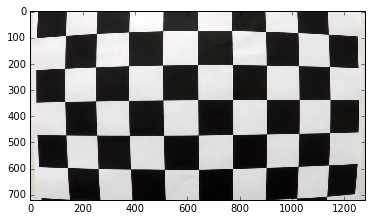

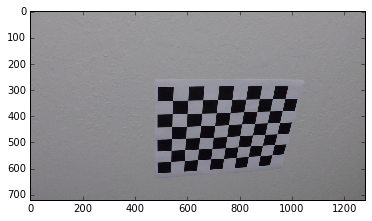

In [74]:
# gets images used for calibration from file
def get_calibration_images():
    images = []
    for image_file in listdir('camera_cal'):
        image = mpimg.imread('camera_cal/'+image_file)
        images.append(image)
    return np.array(images)

calibration_images = get_calibration_images()
plt.figure()
plt.imshow(calibration_images[0])
plt.figure()
plt.imshow(calibration_images[1])

Now that we have some images, we notice that there are (9x6) corners on the chess board! We can also see that the first image is not that great. This means we should probably filter the images that do not have the full 9x6 chess board in thier image frame. During the filtering, we also get the corners for the chess images so we can use them later!

No proper chessboard was found in image 0
Image 1 has a proper chessboard
Image 2 has a proper chessboard
Image 3 has a proper chessboard
Image 4 has a proper chessboard
Image 5 has a proper chessboard
Image 6 has a proper chessboard
Image 7 has a proper chessboard
Image 8 has a proper chessboard
Image 9 has a proper chessboard
Image 10 has a proper chessboard
Image 11 has a proper chessboard
Image 12 has a proper chessboard
Image 13 has a proper chessboard
No proper chessboard was found in image 14
No proper chessboard was found in image 15
Image 16 has a proper chessboard
Image 17 has a proper chessboard
Image 18 has a proper chessboard
Image 19 has a proper chessboard


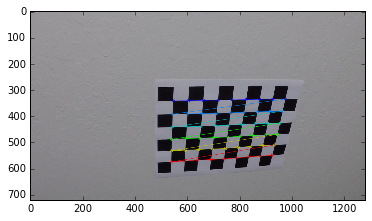

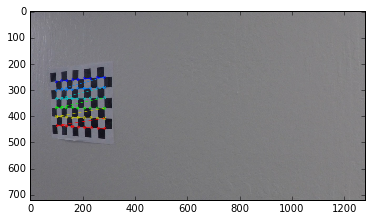

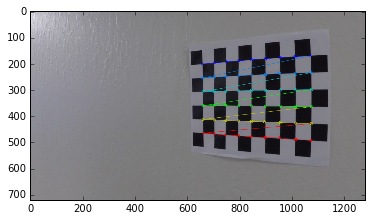

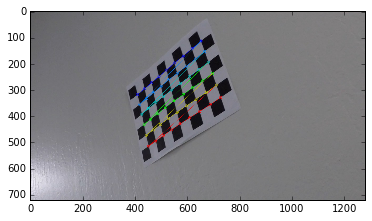

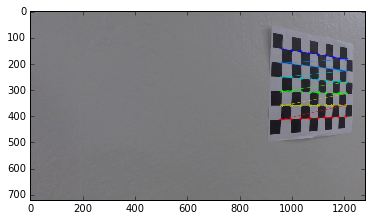

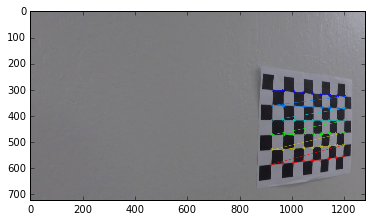

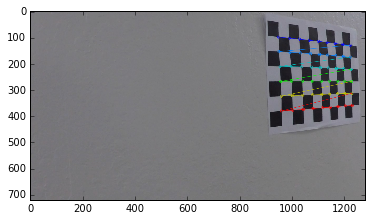

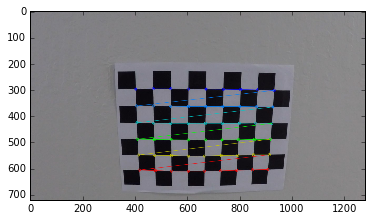

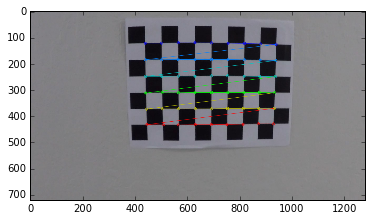

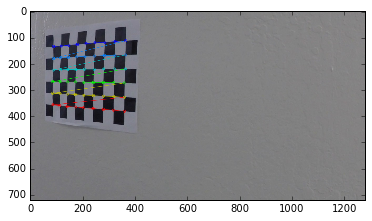

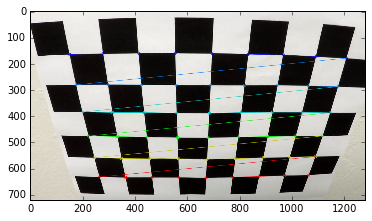

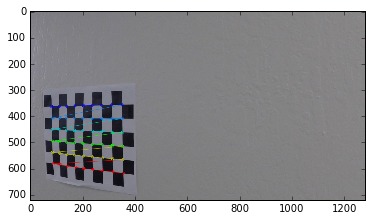

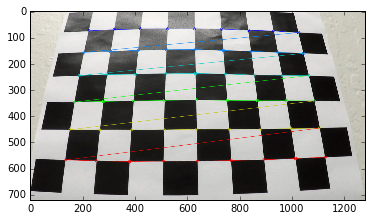

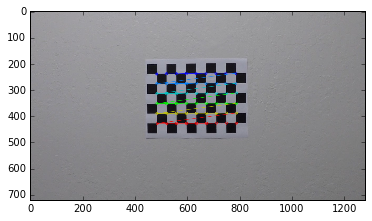

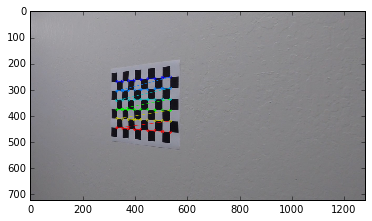

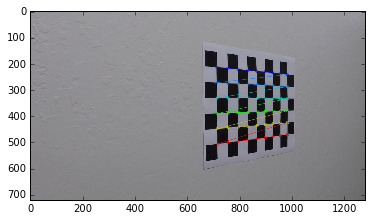

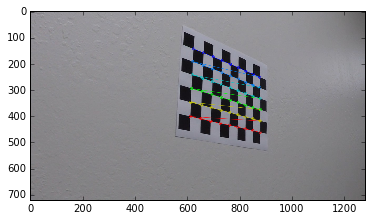

In [75]:
chess_board_size = (9,6)
obj_points = []
img_points = []

objp = np.zeros((9*6, 3), np.float32)
objp[:,:2] = np.mgrid[:9,:6].T.reshape(-1, 2)

def get_chess_corners(img, chess_board_size=(9,6), draw_result = False):
    nx, ny = chess_board_size
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    if ret == True:
        # Draw and display the corners
        if draw_result:
            cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
            plt.figure()
            plt.imshow(img)
        return corners
    else:
        return None

# filter and process the chessboard images
proper_calibraiton_indexes = []
for i in range(len(calibration_images)):
    corners = get_chess_corners(calibration_images[i], draw_result=True)
    if type(corners) is not type(np.array([])):
        print("No proper chessboard was found in image", i)
    else:
        print("Image", i, "has a proper chessboard")
        proper_calibraiton_indexes.append(i)
        obj_points.append(objp)
        img_points.append(corners)

calibration_images = calibration_images[proper_calibraiton_indexes]


That looks great! We filtered out 3 images that seem bad, and kept the others, as well as computed the corners for 
each of these images. Now, we undistort the images and see if the camera images can be corrected properly!

In [ ]:
# This ma
# Get the camera matrix and distortion coefficient from the image mappings we detected.
retval, cameraMatrix, distCoeffs, rvecs, tvecs = \
        cv2.calibrateCamera(obj_points, img_points, calibration_images[0].shape[0:2], None, None)

# a function that takes an image, object points, and image points
# performs the camera calibration, image distortion correction and 
# returns the undistorted image
def undistort_image(img, cameraMatrix, distCoeffs):
    return cv2.undistort(img, cameraMatrix, distCoeffs, None, cameraMatrix)


for img in calibration_images:
    undistorted = undistort_image(img, cameraMatrix, distCoeffs)

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=50)
    ax2.imshow(undistorted)
    ax2.set_title('Undistorted Image', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

ERROR! Session/line number was not unique in database. History logging moved to new session 78
